<a href="https://colab.research.google.com/github/GDharan10/Project7_RetailSalsesForecast/blob/main/RetailSalsesForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
# Data cleaning
import pandas as pd
# Establishing database and file system connections.
from google.colab import drive
# Visualization / EDA
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Statistical analysis
from scipy import stats
# Encoding categorical variables and scaling numerical features.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split
# Machine Learning : Evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
stores_file_path = '/content/drive/My Drive/DTM15/Dataset/Retail_salses_forecast/stores_data_set.csv'
sales_file_path = '/content/drive/My Drive/DTM15/Dataset/Retail_salses_forecast/sales_data_set.csv'
Features_file_path = '/content/drive/My Drive/DTM15/Dataset/Retail_salses_forecast/Features_data_set.csv'
stores_df = pd.read_csv(stores_file_path)
sales_df = pd.read_csv(sales_file_path)
features_df = pd.read_csv(Features_file_path)

In [62]:
merged_df = pd.merge(stores_df, sales_df, on='Store', how='outer')
merged_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,05/02/2010,24924.50,False
1,1,A,151315,1,12/02/2010,46039.49,True
2,1,A,151315,1,19/02/2010,41595.55,False
3,1,A,151315,1,26/02/2010,19403.54,False
4,1,A,151315,1,05/03/2010,21827.90,False


In [63]:
df = pd.merge(merged_df, features_df, on=['Store','Date'], how='outer')
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


# **EDA**

## **Data observation**

In [64]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  float64
 3   Dept          421570 non-null  float64
 4   Date          423325 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday_x   421570 non-null  object 
 7   Temperature   423325 non-null  float64
 8   Fuel_Price    423325 non-null  float64
 9   MarkDown1     152433 non-null  float64
 10  MarkDown2     112532 non-null  float64
 11  MarkDown3     138658 non-null  float64
 12  MarkDown4     136466 non-null  float64
 13  MarkDown5     153187 non-null  float64
 14  CPI           422740 non-null  float64
 15  Unemployment  422740 non-null  float64
 16  IsHoliday_y   423325 non-null  bool   
dtypes: bool(1), float64(12), int64(1), object(3)
mem

In [66]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [67]:
# Dependent - Weekly_Sales
# Supervised Regression

continuous_columns = ['Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                      'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
category_columns = ["Store",  "Type",   "IsHoliday_x", "IsHoliday_y", "Dept"]

string_columns = df.select_dtypes(exclude=['int64',"float64","datetime64"]).columns
numeric_columns = df.select_dtypes(include=['int64',"float64"]).columns

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,423325.0,22.203860,12.786244,1.000,11.000000,22.000000,33.000000,45.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.000000,202505.000000,219622.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.030000,20205.852500,693099.360000
Temperature,423325.0,60.067140,18.452599,-7.290,46.670000,62.070000,74.260000,101.950000
Fuel_Price,423325.0,3.361933,0.458038,2.472,2.935000,3.452000,3.738000,4.468000
MarkDown1,152433.0,7246.604247,8319.906707,-2781.450,2230.800000,5336.520000,9210.900000,103184.980000
MarkDown2,112532.0,3337.597289,9461.265420,-265.760,42.000000,194.670000,1943.200000,104519.540000
MarkDown3,138658.0,1449.098932,9674.705234,-179.260,5.140000,24.830000,104.500000,149483.310000
MarkDown4,136466.0,3382.019834,6306.728468,0.220,500.910000,1465.540000,3592.000000,67474.850000


In [69]:
df[string_columns].describe().T

,count,unique,top,freq
Type,421570,3,A,215478
Date,423325,182,23/12/2011,3027
IsHoliday_x,421570,2,False,391909
IsHoliday_y,423325,2,False,393529


In [70]:
df.isnull().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday_x       1755
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday_y          0
dtype: int64

## **Correlation**

In [71]:
string_columns

Index(['Type', 'Date', 'IsHoliday_x', 'IsHoliday_y'], dtype='object')

In [72]:
corr_df = df.copy()

In [73]:
encode=LabelEncoder()

for column in string_columns:
  encode.fit(corr_df[[column]])
  corr_df[column] = encode.transform(corr_df[[column]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/

In [74]:
corr_df.head(2)

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,0,151315.0,1.0,24,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,0,151315.0,2.0,24,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0


In [75]:
corr_df.corr()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Store,1.000000,0.220946,-0.182881,0.024004,0.000027,-0.085195,0.001264,-0.050010,0.065511,-0.119556,-0.035294,-0.031497,-0.009739,-0.025095,-0.211049,0.208441,-0.000539
Type,0.220946,1.000000,-0.811593,0.003708,-0.000093,-0.182242,0.098412,0.037398,0.035842,-0.237621,-0.059436,-0.031056,-0.098330,-0.234263,-0.063017,0.140187,-0.000402
Size,-0.182881,-0.811593,1.000000,-0.002966,-0.000438,0.243828,0.000593,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238,0.000593
Dept,0.024004,0.003708,-0.002966,1.000000,-0.000661,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,0.000916
Date,0.000027,-0.000093,-0.000438,-0.000661,1.000000,-0.005319,0.040138,0.036034,0.027136,-0.300930,0.062465,0.144256,-0.322099,-0.128772,0.002848,-0.003989,0.045916
Weekly_Sales,-0.085195,-0.182242,0.243828,0.148032,-0.005319,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.012774
IsHoliday_x,0.001264,0.098412,0.000593,0.000916,0.040138,0.012774,1.000000,-0.148357,-0.056932,-0.027917,0.276195,0.346404,-0.001473,-0.049689,0.001221,-0.001539,0.898170
Temperature,-0.050010,0.037398,-0.058313,0.004437,0.036034,-0.002312,-0.148357,1.000000,0.142966,-0.042775,-0.323832,-0.096324,-0.063825,-0.016037,0.181789,0.097758,-0.156080
Fuel_Price,0.065511,0.035842,0.003361,0.003572,0.027136,-0.000120,-0.056932,0.142966,1.000000,0.061576,-0.220342,-0.100873,-0.044013,-0.119969,-0.164460,-0.033905,-0.078261
MarkDown1,-0.119556,-0.237621,0.345673,-0.002426,-0.300930,0.085251,-0.027917,-0.042775,0.061576,1.000000,0.024284,-0.107607,0.818921,0.153286,-0.055185,0.049592,-0.030128


In [76]:
correlation_matrix = corr_df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Cividis',
                title="Correlation Matrix")
fig.show()

## **Data visualization**

In [77]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

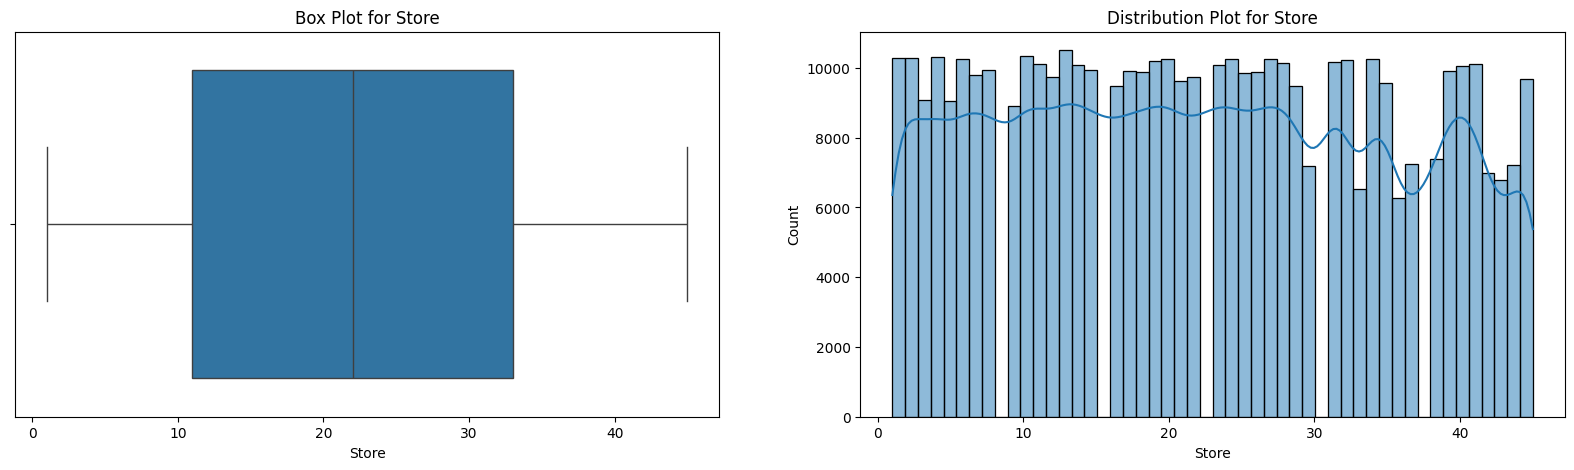

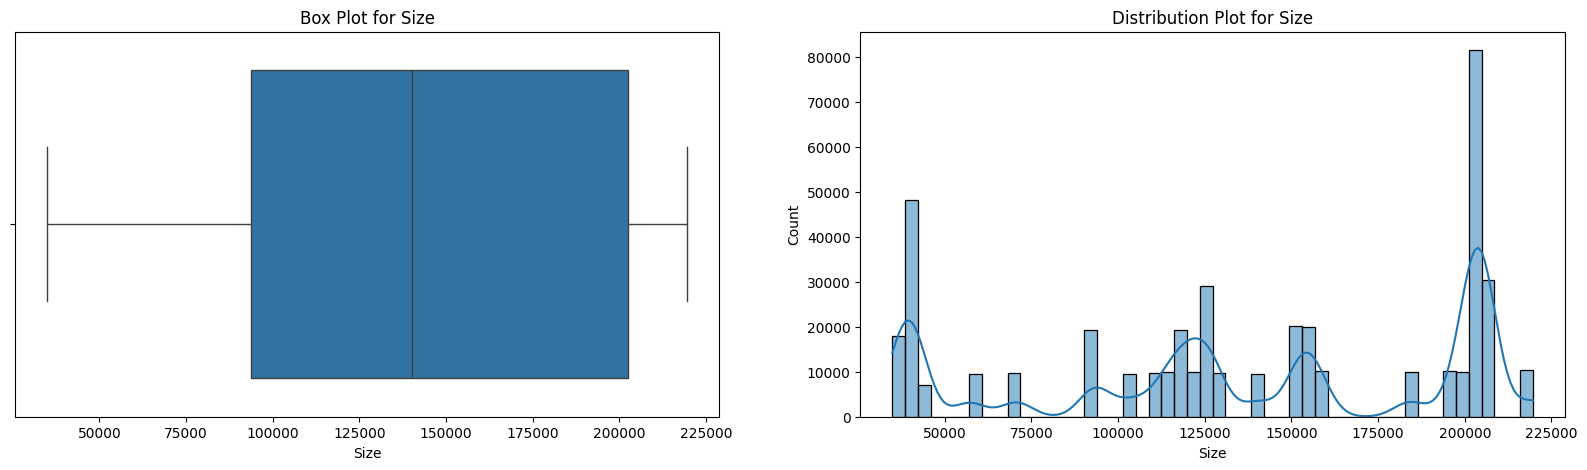

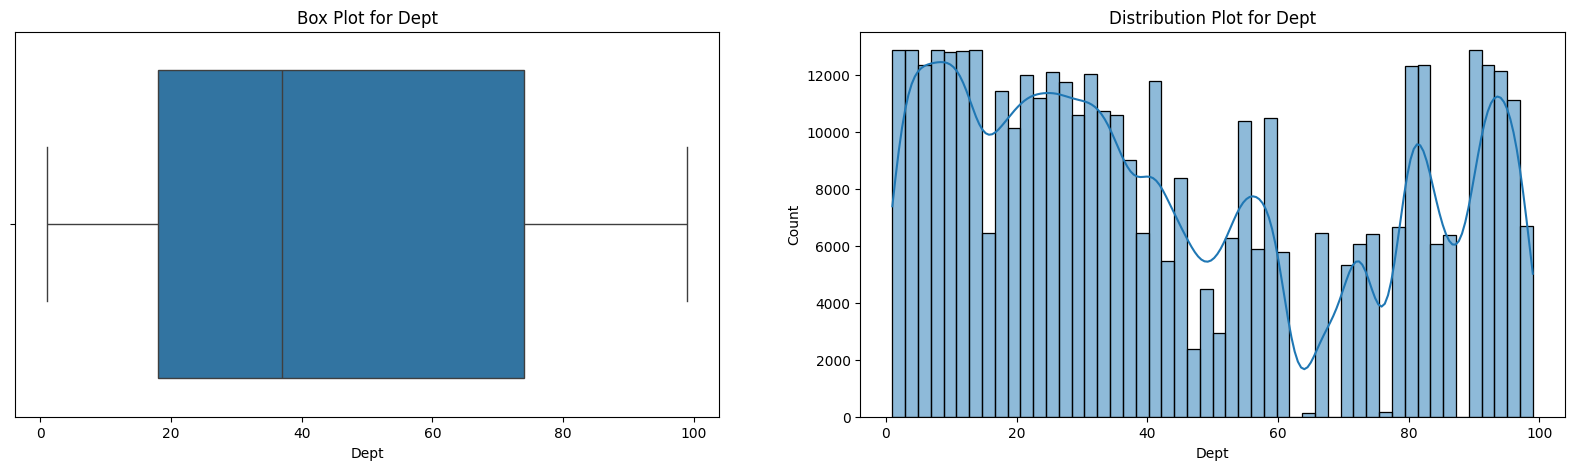

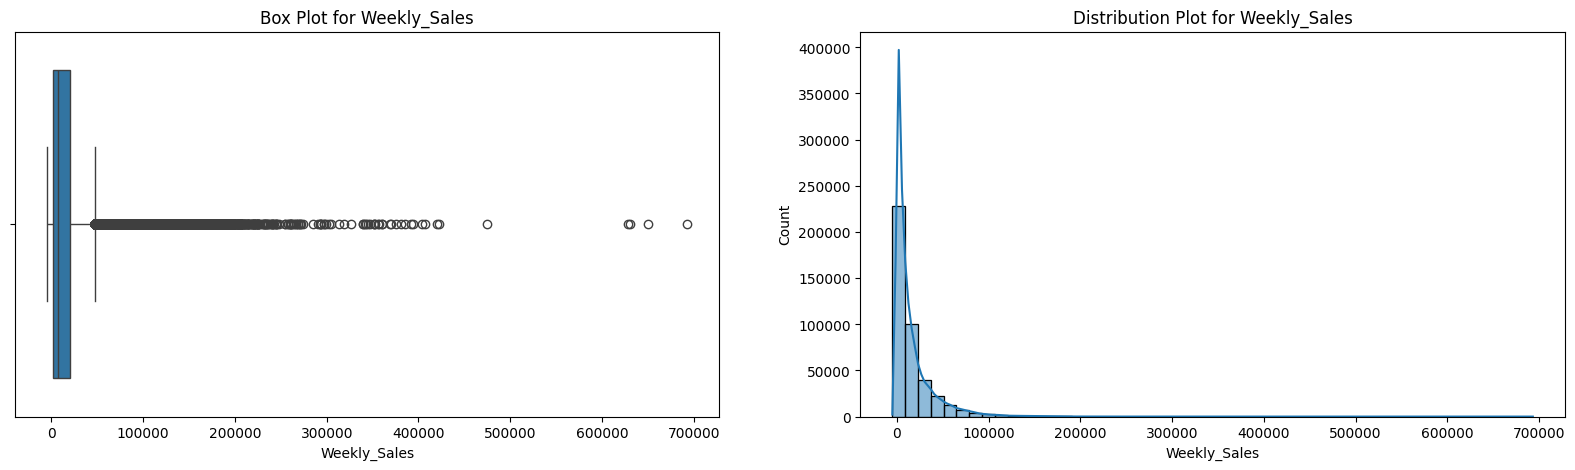

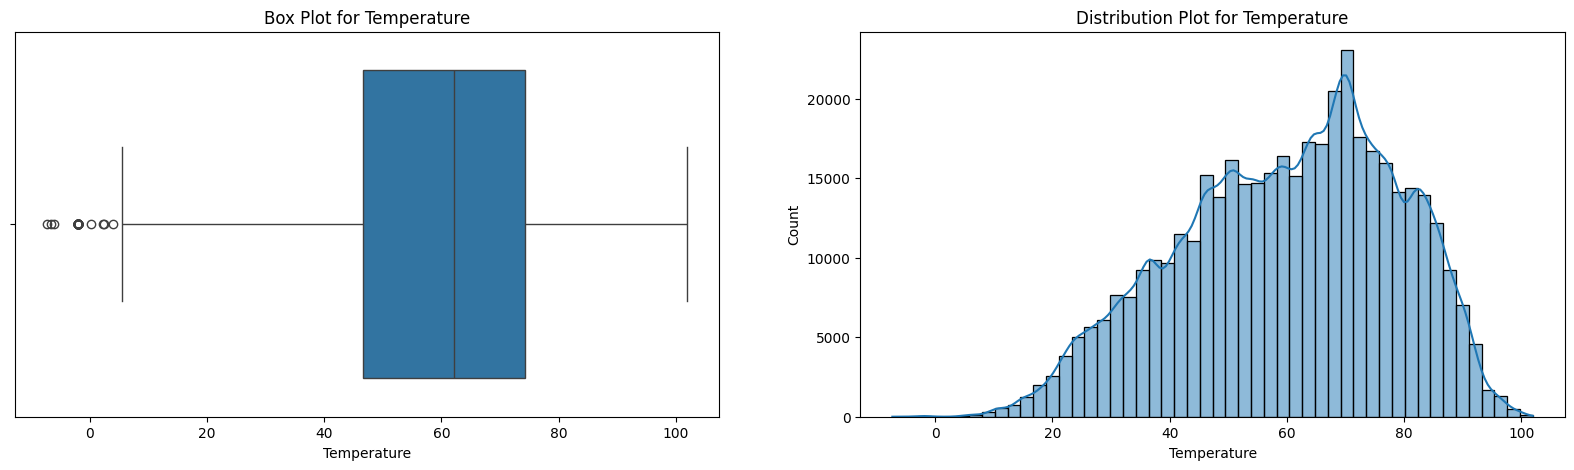

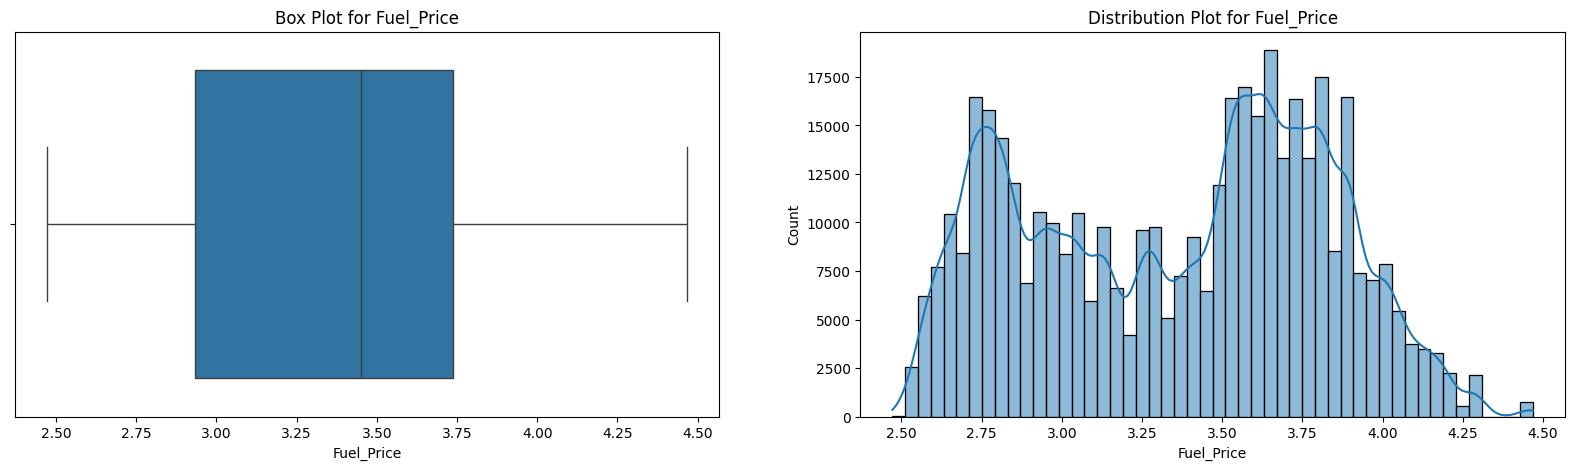

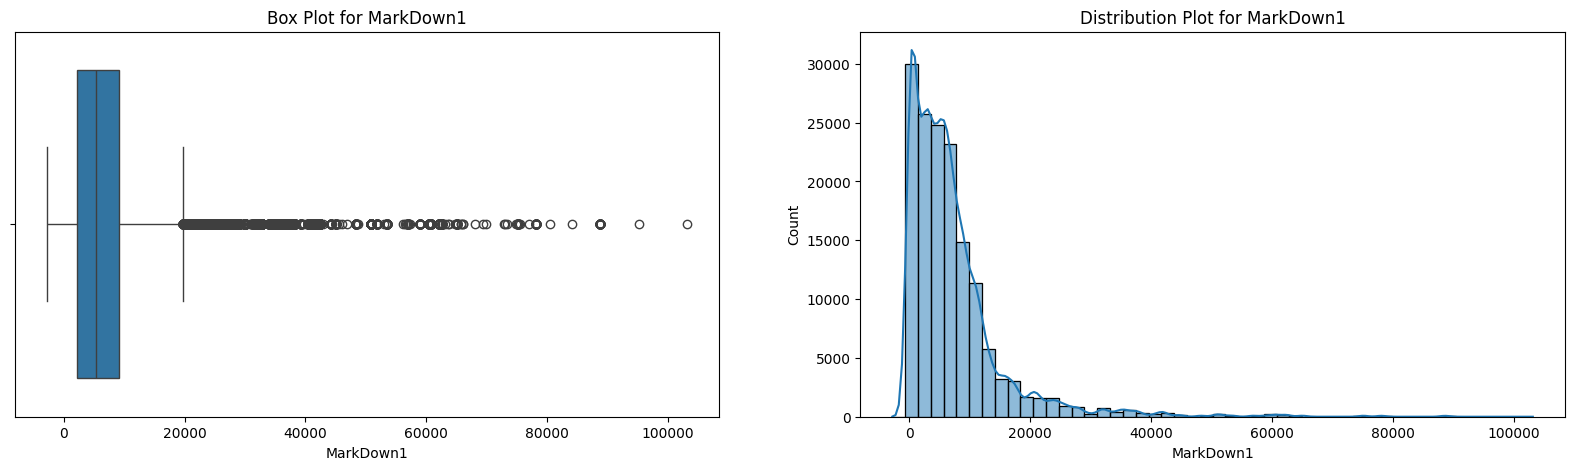

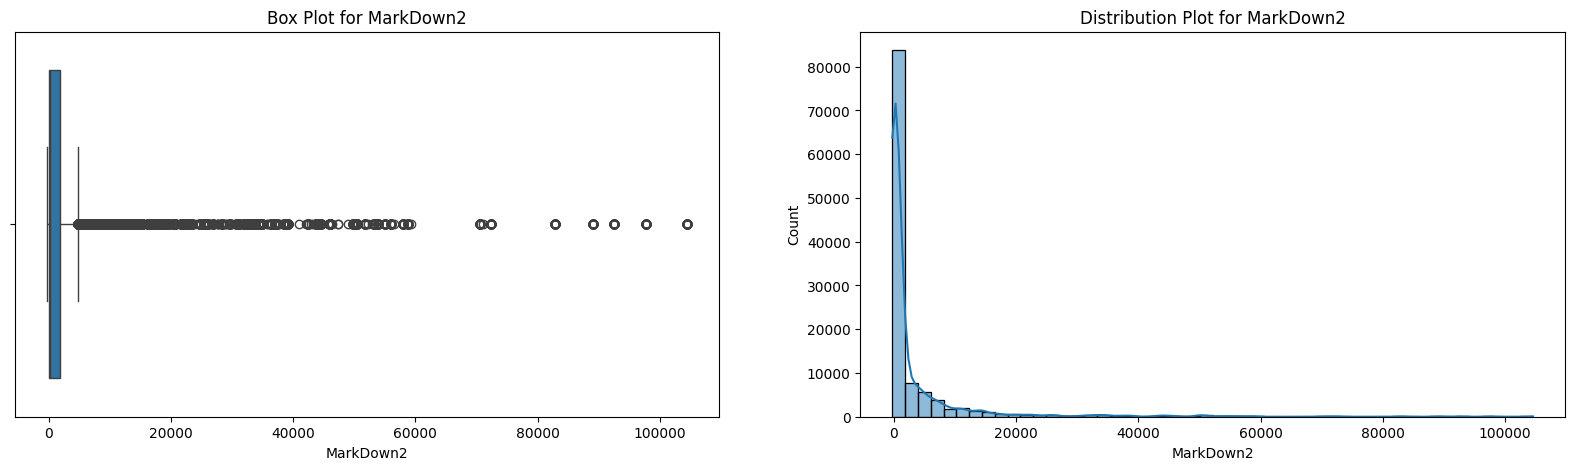

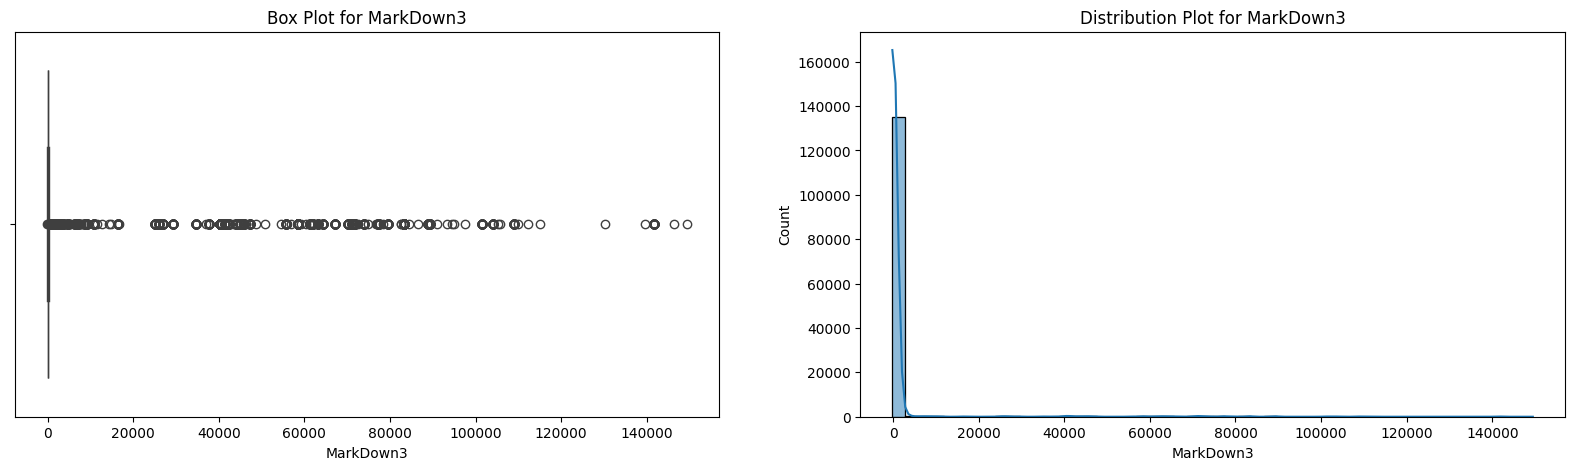

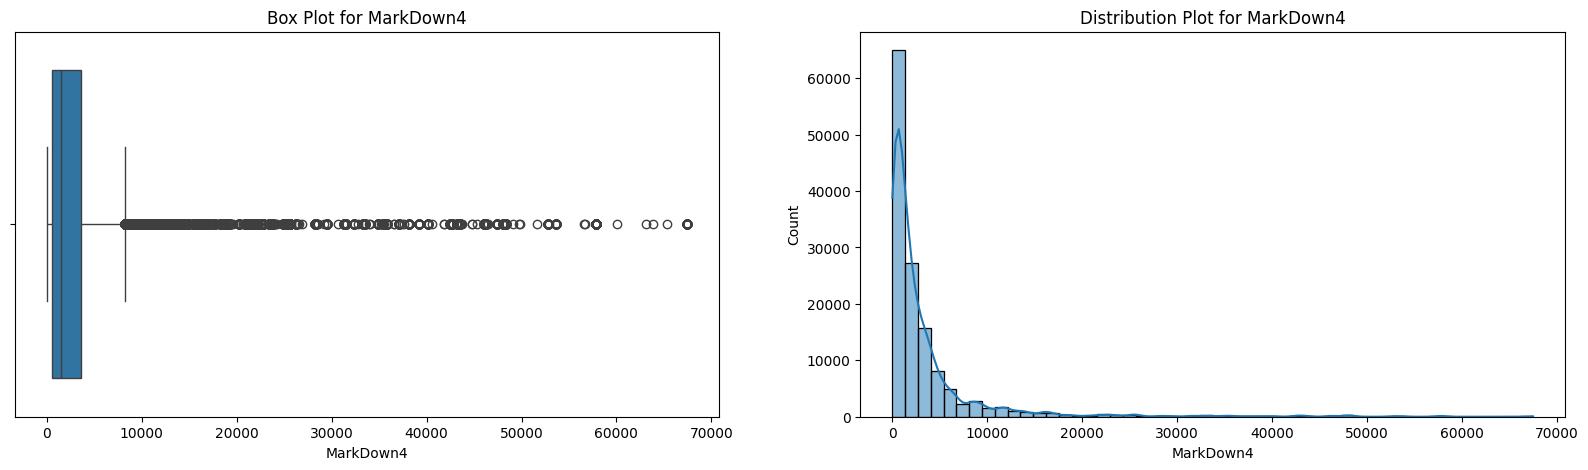

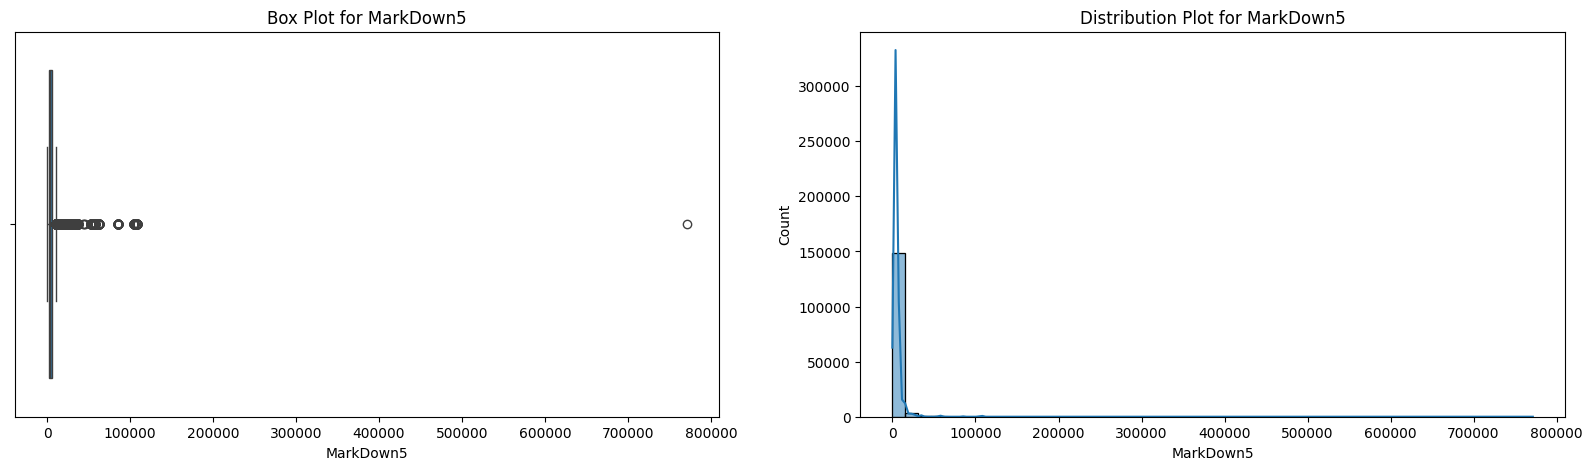

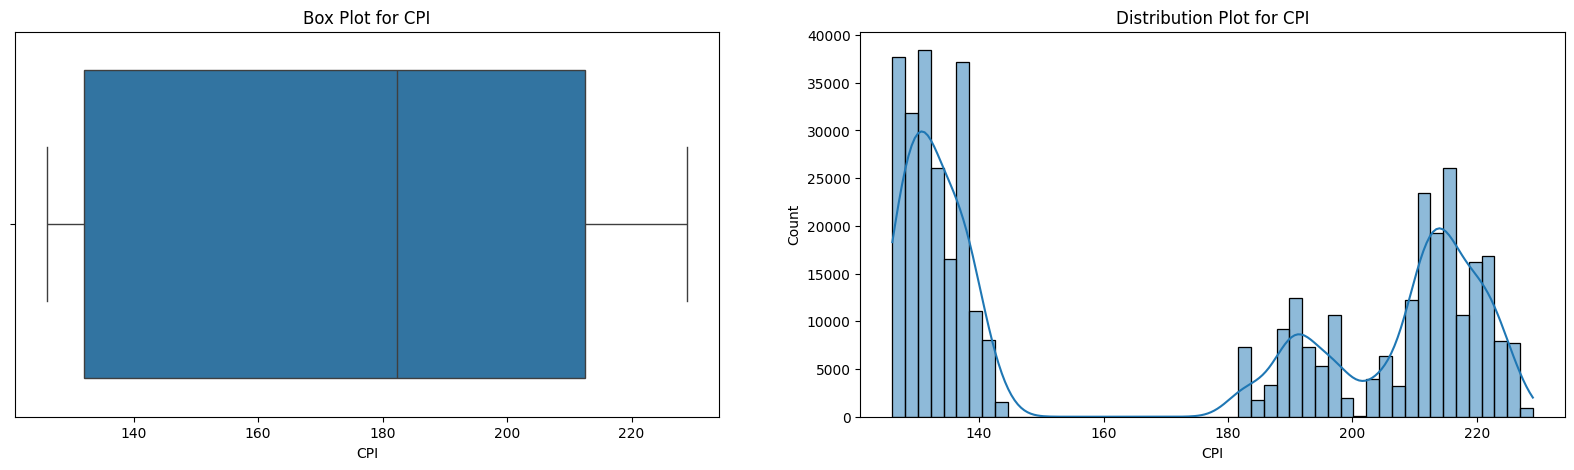

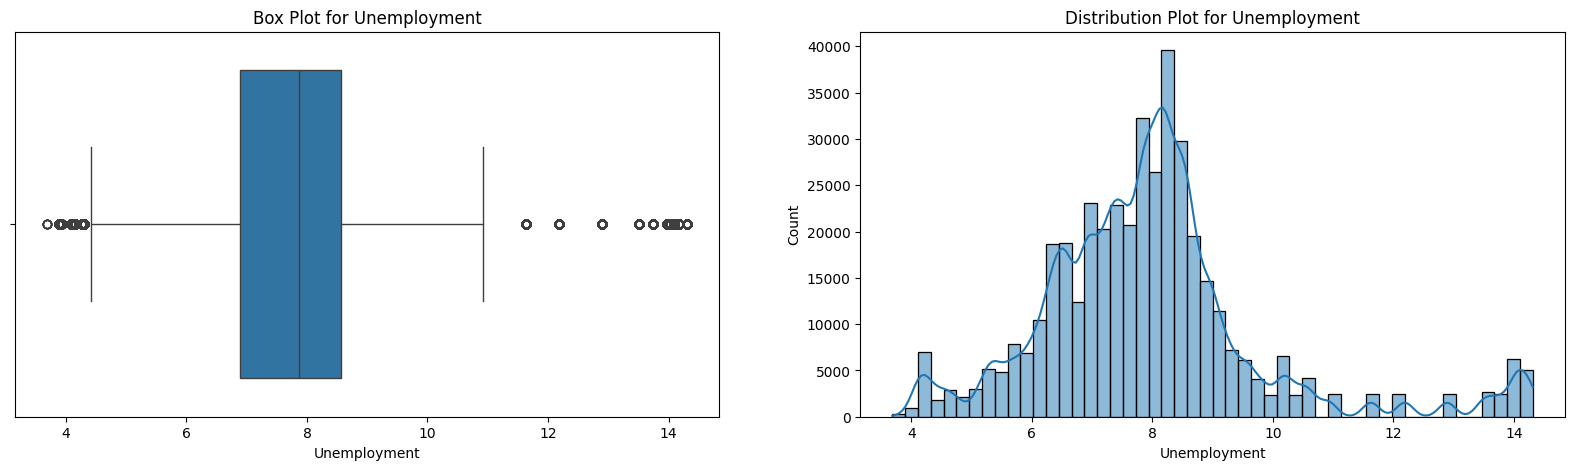

In [78]:
for i in numeric_columns:
    plot(df, i)

# **Data Preprocessing**

In [79]:
df.head(2)

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [80]:
#Cleaning
df.duplicated().sum()

0

In [81]:
df.isnull().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday_x       1755
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday_y          0
dtype: int64

In [82]:
df[df[['Type', 'Size', 'Dept','Weekly_Sales', 'IsHoliday_x']].isnull().any(axis=1)]

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421570,1,NaN,NaN,NaN,02/11/2012,NaN,NaN,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False
421571,1,NaN,NaN,NaN,09/11/2012,NaN,NaN,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False
421572,1,NaN,NaN,NaN,16/11/2012,NaN,NaN,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False
421573,1,NaN,NaN,NaN,23/11/2012,NaN,NaN,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True
421574,1,NaN,NaN,NaN,30/11/2012,NaN,NaN,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,NaN,NaN,NaN,28/06/2013,NaN,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
423321,45,NaN,NaN,NaN,05/07/2013,NaN,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
423322,45,NaN,NaN,NaN,12/07/2013,NaN,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
423323,45,NaN,NaN,NaN,19/07/2013,NaN,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [83]:
df.dropna(subset=['Type', 'Size', 'Dept', 'Weekly_Sales', 'IsHoliday_x'], inplace=True)

In [84]:
df.isnull().sum()

Store                0
Type                 0
Size                 0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [85]:
df.IsHoliday_x.value_counts()

IsHoliday_x
False    391909
True      29661
Name: count, dtype: int64

In [86]:
df.IsHoliday_y.value_counts()

IsHoliday_y
False    391909
True      29661
Name: count, dtype: int64

In [87]:
df= df.drop(columns=['IsHoliday_x'])

In [88]:
# Replace column name
df.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)

In [53]:
print("Markdown1=", df.MarkDown1.isnull().sum()/df.shape[0])
print("Markdown2=", df.MarkDown2.isnull().sum()/df.shape[0])
print("Markdown3=", df.MarkDown3.isnull().sum()/df.shape[0])
print("Markdown4=", df.MarkDown4.isnull().sum()/df.shape[0])
print("Markdown5=", df.MarkDown5.isnull().sum()/df.shape[0])

Markdown1= 0.6425718148824632
Markdown2= 0.7361102545247528
Markdown3= 0.6748084541120098
Markdown4= 0.6798467632896079
Markdown5= 0.6407903788220224


In [55]:
len(df[df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].isnull().all(axis=1)])

270138

In [89]:
df.MarkDown1.fillna(0, inplace = True)
df.MarkDown2.fillna(0, inplace = True)
df.MarkDown3.fillna(0, inplace = True)
df.MarkDown4.fillna(0, inplace = True)
df.MarkDown5.fillna(0, inplace = True)

In [91]:
df.Date=pd.to_datetime(df.Date, format="%d/%m/%Y")

In [ ]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayOfWeek'] = df['Date'].dt.day

In [94]:
df = df.drop(columns=['Date'])

In [ ]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [98]:
len(df[df['Unemployment'] > 11])

23917

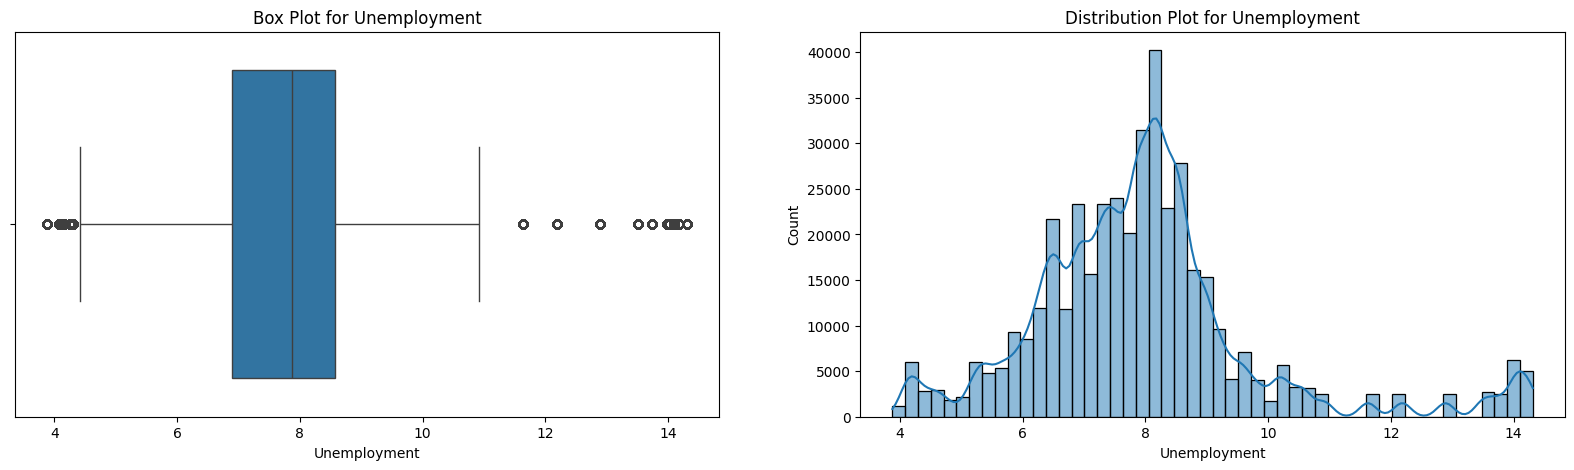

In [96]:
plot(df, 'Unemployment')

In [104]:
df.shape

(421570, 18)

In [108]:
len(df[df['Temperature'] < 5])

69

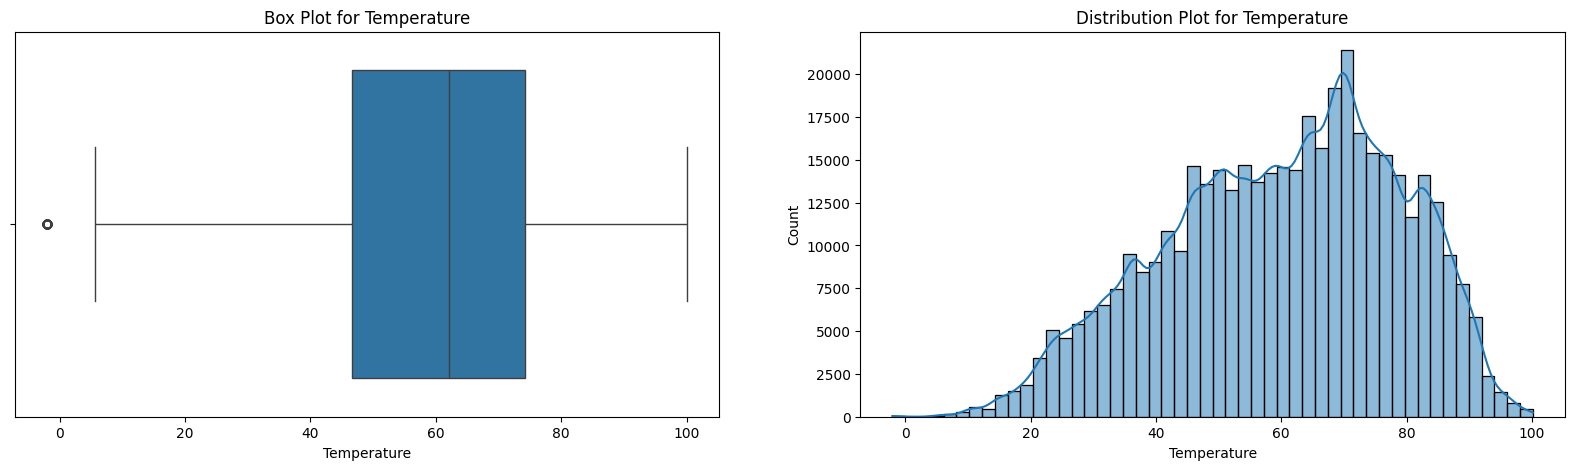

In [99]:
plot(df, 'Temperature')

In [116]:
df1 = df[(df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] != 0).any(axis=1)]

In [120]:
z_scores = stats.zscore(df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']])
z_scores

NameError: name 'stats' is not defined

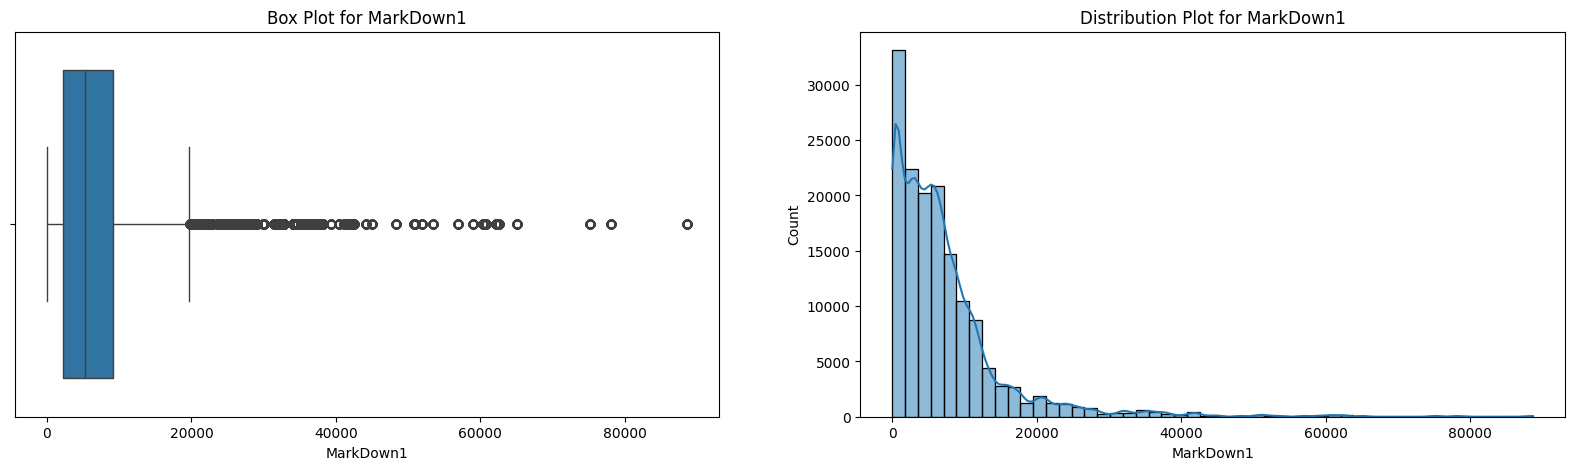

In [119]:
plot(df1, 'MarkDown1')

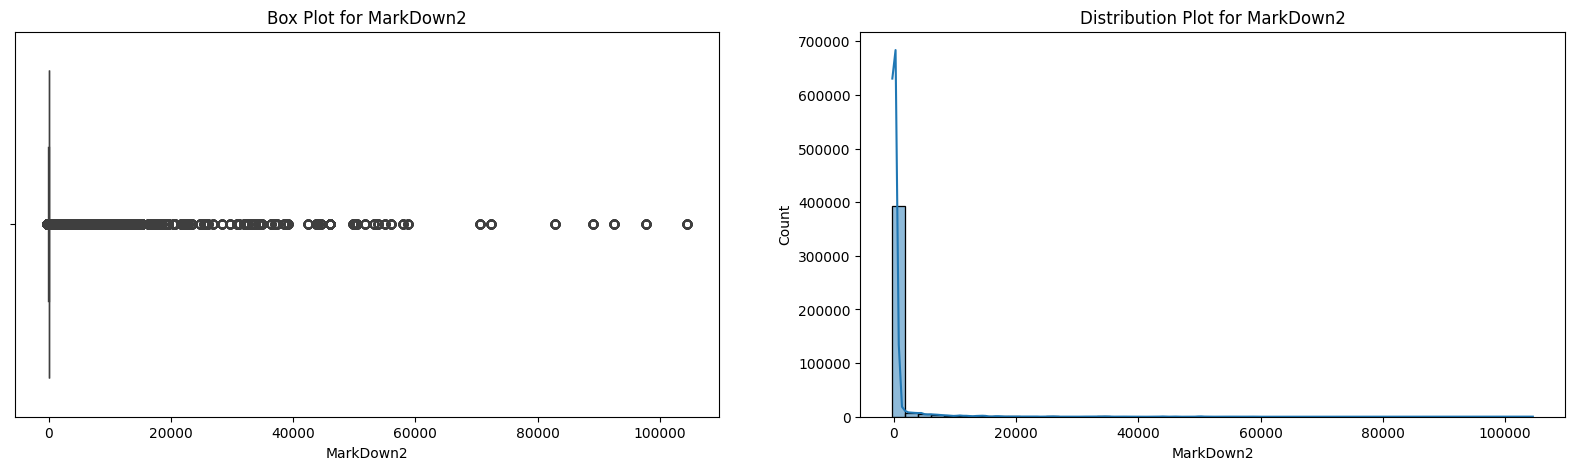

In [113]:
plot(df, 'MarkDown2')

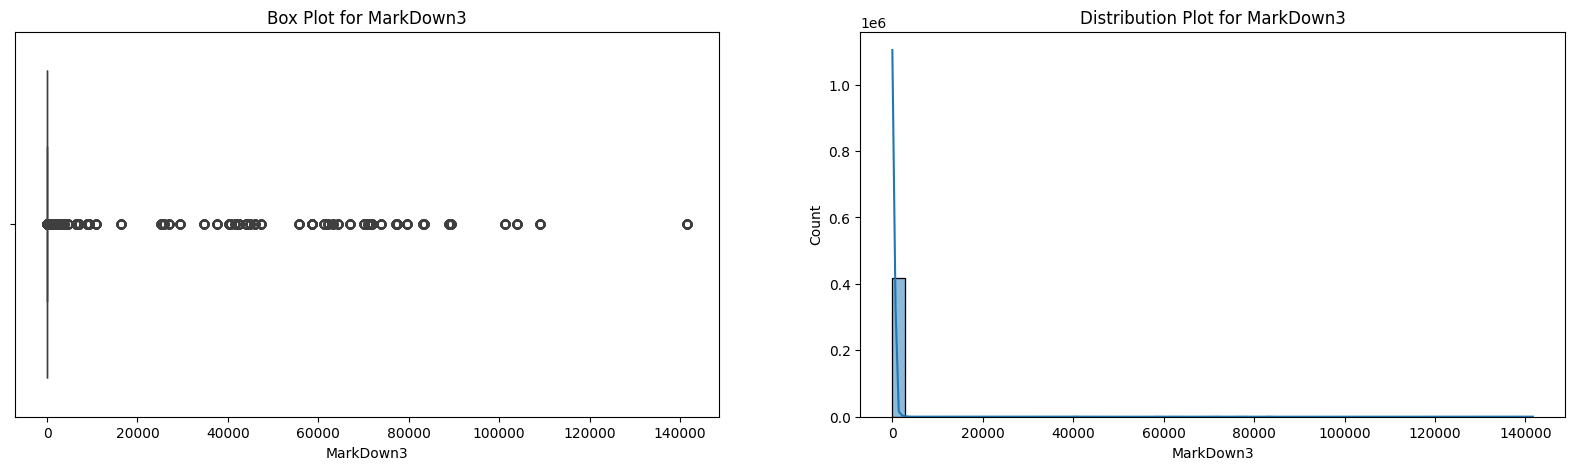

In [112]:
plot(df, 'MarkDown3')

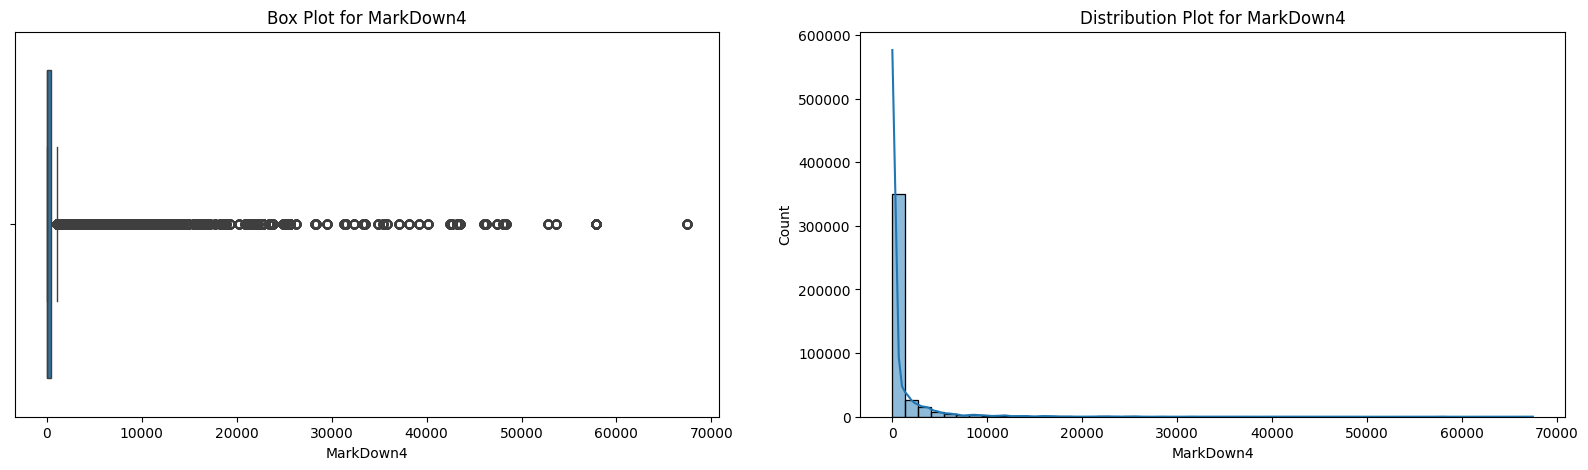

In [111]:
plot(df, 'MarkDown4')

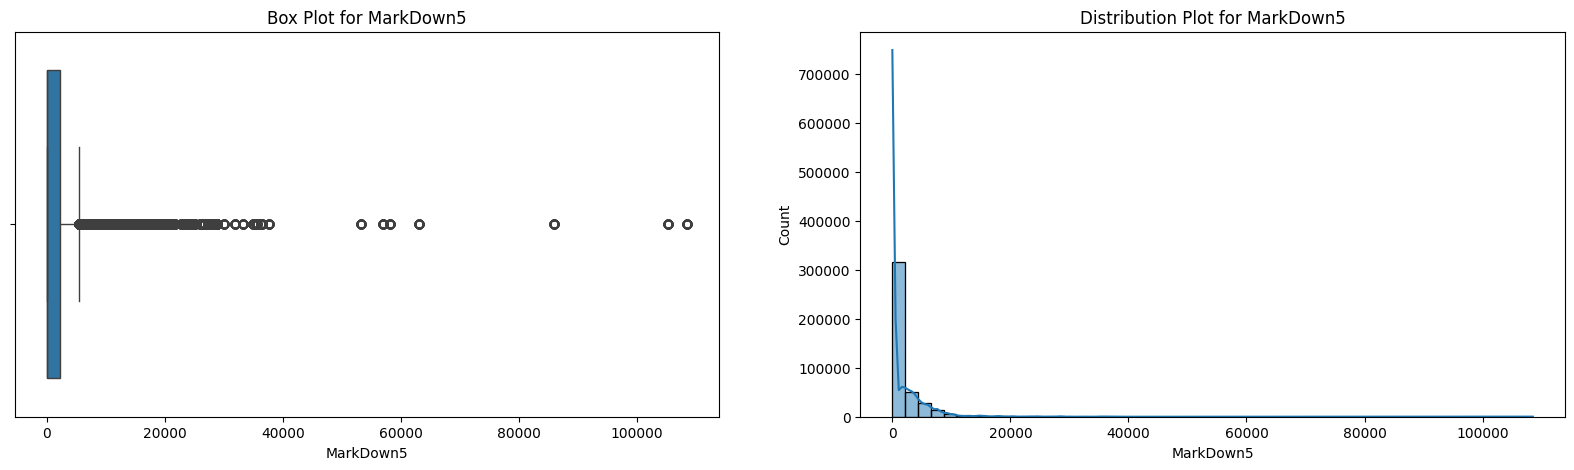

In [110]:
plot(df, 'MarkDown5')

In [ ]:
iqr = df1['Weekly_Sales'].quantile(0.75) - df1['Weekly_Sales'].quantile(0.25)
upper_threshold = df1['Weekly_Sales'].quantile(0.75) + (1.5*iqr)
lower_threshold = df1['Weekly_Sales'].quantile(0.25) - (1.5*iqr)
iqr,upper_threshold,lower_threshold

(18126.2025, 47395.15625, -25109.653749999998)

In [ ]:
df1.Weekly_Sales.describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

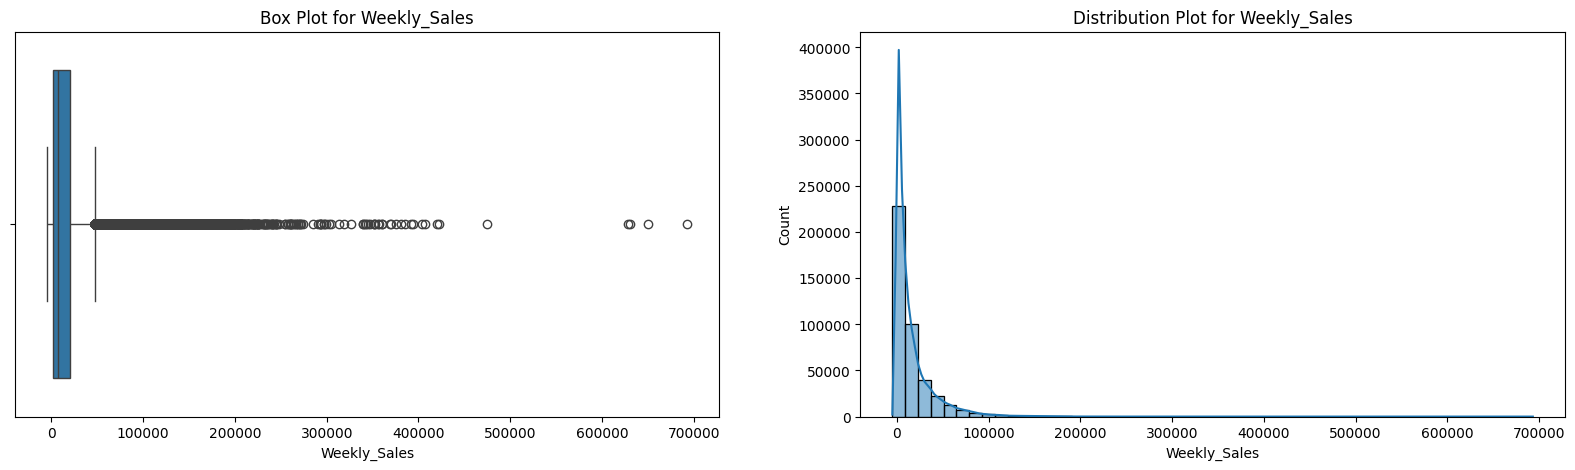

In [ ]:
plot(df1, 'Weekly_Sales')

In [ ]:
len(df1[df1['Weekly_Sales'] < 0])

1285

In [ ]:
len(df1[df1['Weekly_Sales'] >= 250000])

62

In [ ]:
df1.shape

(421570, 18)

In [ ]:
df1.drop(df1[df1['Weekly_Sales'] < 0].index, inplace=True)

In [ ]:
df1.drop(df1[df1['Weekly_Sales'] >= 250000].index, inplace=True)

In [ ]:
df1.shape

(420223, 18)

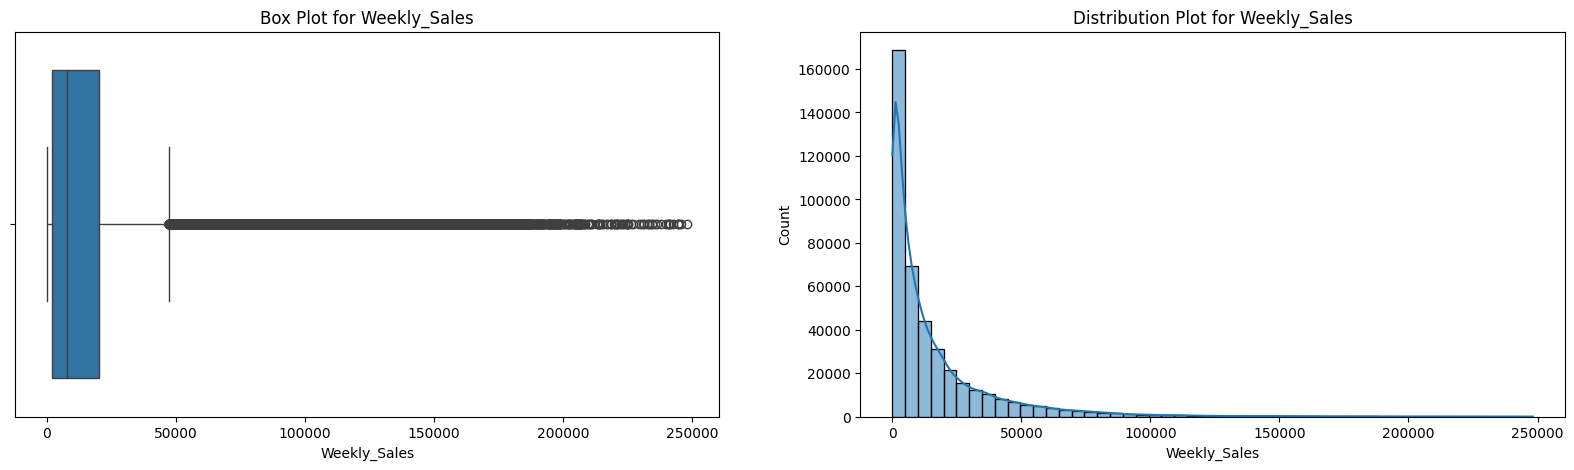

In [ ]:
plot(df1, 'Weekly_Sales')

# **Encoding**

In [ ]:
df1.head(2)

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,month,year,day
0,1,A,151315.0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
1,1,A,151315.0,2.0,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5


In [ ]:
columns=["Type", "IsHoliday_y"]
encode=LabelEncoder()

for column in columns:
  encode.fit(df1[[column]])
  df1[column] = encode.transform(df1[[column]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
df1.head(2)

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,month,year,day
0,1,0,151315.0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2,2010,5
1,1,0,151315.0,2.0,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2,2010,5


# **Machine Learning**

In [ ]:
x=df1.drop("Weekly_Sales",axis=1)
y=df1["Weekly_Sales"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
from sklearn.svm import SVR
Model2=SVR().fit(x_train,y_train)
y_pred_train = Model2.predict(x_train)
y_pred_test = Model2.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

In [ ]:
from sklearn import linear_model
Model3=linear_model.Lasso().fit(x_train,y_train)
y_pred_train = Model3.predict(x_train)
y_pred_test = Model3.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.08963441513698123, 0.0891627579629084)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Model4=DecisionTreeRegressor().fit(x_train,y_train)
y_pred_train = Model4.predict(x_train)
y_pred_test = Model4.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(1.0, 0.9610175905013079)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Model5=RandomForestRegressor().fit(x_train,y_train)
y_pred_train = Model5.predict(x_train)
y_pred_test = Model5.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.9970390541091647, 0.9771264774430414)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
Model6=GradientBoostingRegressor().fit(x_train,y_train)
y_pred_train = Model6.predict(x_train)
y_pred_test = Model6.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.7560085373814474, 0.7491360477297497)